In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [2]:
df= pd.read_csv('full_month_grid.csv')

In [3]:
df.head()

,Unnamed: 0,time,grid_num,rate
0,0,2013-11-01 00:00:00,1,11.621593
1,1,2013-11-01 00:00:00,2,11.647701
2,2,2013-11-01 00:00:00,3,11.675491
3,3,2013-11-01 00:00:00,4,11.545972
4,4,2013-11-01 00:00:00,5,10.479600


In [4]:
df.shape

(90687616, 4)

In [5]:
df.isna().sum()

Unnamed: 0       0
time             0
grid_num         0
rate          2761
dtype: int64

In [6]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
df.head()

,time,grid_num,rate
0,2013-11-01 00:00:00,1,11.621593
1,2013-11-01 00:00:00,2,11.647701
2,2013-11-01 00:00:00,3,11.675491
3,2013-11-01 00:00:00,4,11.545972
4,2013-11-01 00:00:00,5,10.479600


In [8]:
df["time"] = pd.to_datetime(df["time"])
df = df.set_index("time")

In [10]:
df.head()

,grid_num,rate
time,,
2013-11-01,1,11.621593
2013-11-01,2,11.647701
2013-11-01,3,11.675491
2013-11-01,4,11.545972
2013-11-01,5,10.479600


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90687616 entries, 2013-11-01 00:00:00 to 2014-01-01 23:50:00
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   grid_num  int64  
 1   rate      float64
dtypes: float64(1), int64(1)
memory usage: 2.0 GB


In [11]:
df = df.groupby("time").sum()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8928 entries, 2013-11-01 00:00:00 to 2014-01-01 23:50:00
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   grid_num  8928 non-null   int64  
 1   rate      8928 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 209.2 KB


In [14]:
df.shape

(8928, 2)

In [15]:
df.head()

,grid_num,rate
time,,
2013-11-01 00:00:00,50005000,710841.049680
2013-11-01 00:10:00,50005000,689606.902359
2013-11-01 00:20:00,50005000,673841.228490
2013-11-01 00:30:00,50005000,641464.168550
2013-11-01 00:40:00,50005000,623366.124033


In [16]:
df.drop(columns = ["grid_num"], inplace = True)

In [17]:
df.head()

,rate
time,
2013-11-01 00:00:00,710841.049680
2013-11-01 00:10:00,689606.902359
2013-11-01 00:20:00,673841.228490
2013-11-01 00:30:00,641464.168550
2013-11-01 00:40:00,623366.124033


In [ ]:
df.to_csv("full_month_grid.csv")

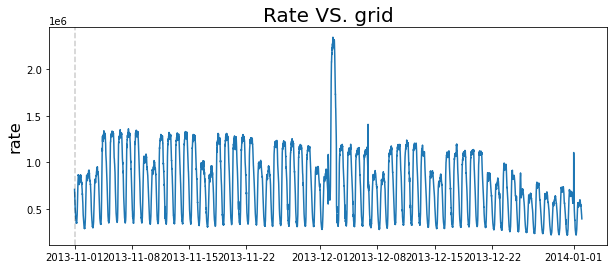

In [23]:
plt.figure(figsize=(10,4))
plt.plot(df)
plt.title('Rate VS. grid', fontsize=20)
plt.ylabel('rate', fontsize=16)
start_date = datetime(2013,11,1)
end_date = datetime(2014,1,1)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-11-01'), color='k', linestyle='--', alpha=0.2)